In [4]:
import numpy as np
import pandas as pd
import pathlib
import librosa
import os
from utils import mfccs, post2df
import matplotlib.pyplot as plt
from feature_extraction import *

[30870.0, 8820.0, 13230.0, 37485.0, 4410.0, 17640.0, 13230.0, 37485.0, 4410.0, 11025.0, 19845.0, 6615.0, 17640.0, 11025.0, 4410.0, 22050.0, 19845.0, 17640.0, 57330.0, 17640.0, 13230.0, 28665.0, 2205.0, 8820.0, 6615.0, 13230.0, 2205.0, 2205.0, 2205.0, 2205.0, 6615.0, 4410.0, 17640.0, 4410.0, 4410.0, 59535.0, 4410.0, 24255.0, 13230.0, 30870.0, 15435.0, 13230.0, 13230.0, 35280.0, 22050.0, 15435.0, 8820.0, 11025.0, 8820.0, 63945.0, 6615.0, 24255.0, 17640.0, 4410.0, 4410.0, 2205.0, 11025.0, 4410.0, 11025.0, 26460.0, 19845.0, 52920.0, 8820.0, 11025.0, 19845.0, 13230.0, 41895.0, 28665.0, 15435.0, 22050.0, 13230.0, 33075.0, 4410.0, 13230.0, 4410.0, 39690.0, 11025.0, 28665.0, 2205.0, 13230.0, 15435.0, 4410.0, 30870.0, 28665.0, 19845.0, 8820.0, 24255.0, 8820.0, 22050.0, 2205.0, 13230.0, 15435.0, 52920.0, 11025.0, 26460.0, 2205.0, 24255.0, 2205.0, 22050.0, 2205.0, 26460.0, 28665.0, 17640.0, 13230.0, 6615.0, 4410.0, 26460.0, 15435.0, 8820.0, 8820.0, 57330.0, 13230.0, 26460.0, 55125.0, 8820.0, 5292

,name,active_range,frquency,duration
0,/home/andriy/diploma/data/australian_sample.wav,"[(28665.0, 59535.0), (79380.0, 88200.0), (9261...",22050,574.833243


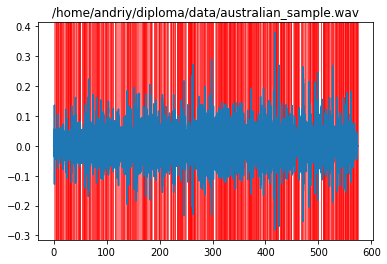

In [5]:
NAME = 'australian_sample'
PATH = f'/home/andriy/diploma/data/{NAME}.wav'
df = pd.DataFrame(columns=['name', 'active_range', 'frquency', 'duration'])
df['name'], df['active_range'], df['frquency'], df['duration'], rmax = post2df([PATH])
df

In [6]:
dataset = pd.DataFrame(columns='filename accent sex mfccs'.split())
for i, row in df.iterrows():
    dataset = dataset.append(extract_mfccs_from_file(row['name'], row['active_range'], row['frquency']))
dataset.head()

,filename,accent,sex,mfccs
0,/home/andriy/diploma/data/australian_sample.wav,NaN,NaN,"[[-690.4019880374256, -642.8221019697394, -559..."
1,/home/andriy/diploma/data/australian_sample.wav,NaN,NaN,"[[-432.71316455302946, -420.64216951982036, -4..."
2,/home/andriy/diploma/data/australian_sample.wav,NaN,NaN,"[[-569.9920989241548, -508.9758442756769, -478..."
3,/home/andriy/diploma/data/australian_sample.wav,NaN,NaN,"[[-502.39117997786326, -519.2181641784676, -54..."
4,/home/andriy/diploma/data/australian_sample.wav,NaN,NaN,"[[-519.4247178937325, -527.1536528376913, -558..."


In [8]:
dataset = dataset.drop('filename accent sex'.split(), axis=1)
dataset.to_pickle(f'/home/andriy/diploma/CNN/cnn/{NAME}.pkl')
dataset

KeyError: "['filename' 'accent' 'sex'] not found in axis"

In [5]:
arr2 = ['mfccs0', 'mfccs1', 'mfccs2', 'mfccs3', 'mfccs4', 'mfccs5', 'mfccs6', 'mfccs7', 'mfccs8', 'mfccs9', 'mfccs10', 'mfccs11', 'mfccs12', 'mfccs13', 'mfccs14', 'mfccs15', 'mfccs16', 'mfccs17', 'mfccs18', 'mfccs19']
new_df = pd.DataFrame(columns=arr2)
for i, row in dataset.iterrows():
    d = dict()
    j = 0
    for mfccs in row['mfccs']:
        d[arr2[j]] = np.mean(mfccs.T)
        j += 1
    new_df = new_df.append(d, ignore_index=True)
new_df

,mfccs0,mfccs1,mfccs2,mfccs3,mfccs4,mfccs5,mfccs6,mfccs7,mfccs8,mfccs9,mfccs10,mfccs11,mfccs12,mfccs13,mfccs14,mfccs15,mfccs16,mfccs17,mfccs18,mfccs19
0,-430.947786,61.680485,-31.932617,79.238834,-20.183481,-22.802081,0.050954,-12.222050,-24.546997,7.738628,-25.128970,-1.218341,-22.287415,-6.668797,-2.746419,-13.947361,-4.576753,-7.791707,-6.151806,-0.807866
1,-700.472891,19.046094,8.391341,2.337616,-5.704956,-9.575362,-3.444111,-0.565775,-9.963947,3.860685,-13.879308,-3.032145,-4.325703,1.838993,-3.709635,9.904767,3.836077,-3.507716,-0.030687,-0.348879
2,-714.320731,44.112492,23.502102,10.243437,3.889785,-12.413767,-8.826869,0.182521,-14.934897,3.897652,-13.909224,0.652992,-6.132016,-1.809461,-9.081561,5.432776,-7.170426,-8.532379,0.571919,-2.324519
3,-507.257662,131.186110,-10.904601,21.451285,-9.921851,-22.822916,-13.963450,-5.047374,-11.715983,12.653043,-17.174488,-15.584317,-9.806654,-14.634099,-26.382488,2.880414,-4.987972,-22.371552,7.604260,-0.328454
4,-558.635236,59.701468,-10.262281,26.241451,-2.459578,-21.182521,-14.977607,0.615896,-4.102997,-0.417793,-10.755425,-2.415373,-15.395120,-4.258518,-19.107907,-2.239775,-2.665414,-16.415545,-2.329190,0.718919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,-515.479890,21.156069,4.499019,23.687512,-17.072305,-9.876478,-4.562822,3.604751,-10.705776,-0.733716,-18.025924,5.404294,-16.746122,-5.739393,-12.647213,-6.010793,2.040355,-24.049211,4.920646,-3.569457
406,-466.641806,93.686265,1.182783,16.172531,-14.938201,-21.077282,-19.216366,-5.775035,-26.927519,8.779420,-14.350875,-10.025530,-18.622421,2.228422,-14.565355,-9.426332,-1.128698,-21.002038,-1.237123,3.259853
407,-762.010184,17.839344,12.853600,-4.435094,1.898286,-4.247834,-7.964005,-0.726075,-4.653370,4.952730,-6.232123,-1.921384,-5.363718,2.798449,-6.901961,-4.250939,-1.402658,-4.247030,-3.131533,-1.144054
408,-495.847076,112.105205,11.660709,5.992711,-22.029825,-13.140829,-16.809895,-10.910053,-10.537204,13.137861,-28.423527,-17.928768,-6.097019,-2.027507,-15.471280,-2.169027,-6.821199,-22.178106,-0.604975,-8.830326


In [6]:
new_df.to_pickle(f'/home/andriy/diploma/CNN/cnn/{NAME}.pkl')